In [1]:
queue = []
queue.append('a')
queue.append('b')
queue.append('c')
print("Initial queue")
print(queue)
print("\nElements dequeued from queue")
print(queue.pop(0))
print(queue.pop(0))
print(queue.pop(0))
print("\nQueue after removing elements")
print(queue)


Initial queue
['a', 'b', 'c']

Elements dequeued from queue
a
b
c

Queue after removing elements
[]


In [2]:
from collections import deque
q = deque()
q.append('a')
q.append('b')
q.append('c')
print("Initial queue")
print(q)
print("\nElements dequeued from the queue")
print(q.popleft())
print(q)
print(q.popleft())
print(q)
print(q.popleft())

print("\nQueue after removing elements")
print(q)


Initial queue
deque(['a', 'b', 'c'])

Elements dequeued from the queue
a
deque(['b', 'c'])
b
deque(['c'])
c

Queue after removing elements
deque([])


In [3]:
from queue import Queue
q = Queue(maxsize = 3)
print(q.qsize())
q.put('a')
q.put('b')
q.put('c')

print("Queue object:", q.queue)
print("\nFull: ", q.full())
print("\nElements dequeued from the queue")
print(q.get())
print("Queue object:", q.queue)
print(q.get())
print("Queue object:", q.queue)
print(q.get())
print("\nEmpty: ", q.empty())
q.put(1)
print("\nEmpty: ", q.empty())
print("Full: ", q.full())


0
Queue object: deque(['a', 'b', 'c'])

Full:  True

Elements dequeued from the queue
a
Queue object: deque(['b', 'c'])
b
Queue object: deque(['c'])
c

Empty:  True

Empty:  False
Full:  False


In [4]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []
        self.parent = None

    def add_child(self, child):
        child.parent = self
        self.children.append(child)

    def get_level(self): #to get level of each node
        level =0
        p = self.parent
        while p:
            level += 1
            p = p.parent

        return level
    def print_tree(self):
        space = ' ' * self.get_level() * 3
        prefix = space + '|__' if self.parent else ''
        print(prefix + self.data)#add prefix
        if self.children:
            for child in self.children:
                child.print_tree()

In [5]:
def create_tree():
  a_node = TreeNode("A")
  b_node = TreeNode("B")
  c_node = TreeNode("C")
  d_node = TreeNode("D")
  e_node = TreeNode("E")
  f_node = TreeNode("F")
  g_node = TreeNode("G")

  a_node.add_child(b_node)
  a_node.add_child(c_node)

  b_node.add_child(d_node)
  b_node.add_child(e_node)

  c_node.add_child(f_node)
  c_node.add_child(g_node)
  return a_node

In [6]:
tree = create_tree()
tree.print_tree()

A
   |__B
      |__D
      |__E
   |__C
      |__F
      |__G


In [7]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

In [8]:
a_node = Node("A")
b_node = Node("B")
c_node = Node("C")

In [9]:
from collections import deque

# Node class to define the structure of the node
class Node:
    def __init__(self, val):
        self.data = val
        self.left = self.right = None

# Function to insert nodes
def insert(root, data):
    # If tree is empty, new node becomes the root
    if root is None:
        root = Node(data)
        return root

    # Queue to traverse the tree and find the position to insert the node
    q = deque()
    q.append(root)
    while q:
        temp = q.popleft()
        # Insert node as the left child of the parent node
        if temp.left is None:
            temp.left = Node(data)
            break
        # If the left child is not null push it to the queue
        else:
            q.append(temp.left)
        # Insert node as the right child of parent node
        if temp.right is None:
            temp.right = Node(data)
            break
        # If the right child is not null push it to the queue
        else:
            q.append(temp.right)
    return root

# Function to delete the given deepest node (d_node) in binary tree
def deletDeepest(root, d_node):
    q = deque()
    q.append(root)
    # Do level order traversal until last node
    while q:
        temp = q.popleft()
        if temp == d_node:
            temp = None
            del d_node
            return
        if temp.right:
            if temp.right == d_node:
                temp.right = None
                del d_node
                return
            else:
                q.append(temp.right)
        if temp.left:
            if temp.left == d_node:
                temp.left = None
                del d_node
                return
            else:
                q.append(temp.left)

# Function to delete element in binary tree
def deletion(root, key):
    if not root:
        return None
    if root.left is None and root.right is None:
        if root.data == key:
            return None
        else:
            return root

    q = deque()
    q.append(root)
    temp = None
    key_node = None
    # Do level order traversal to find deepest node (temp) and node to be deleted (key_node)
    while q:
        temp = q.popleft()
        if temp.data == key:
            key_node = temp
        if temp.left:
            q.append(temp.left)
        if temp.right:
            q.append(temp.right)

    if key_node is not None:
        x = temp.data
        key_node.data = x
        deletDeepest(root, temp)
    return root

# Inorder tree traversal (Left - Root - Right)
def inorderTraversal(root):
    if not root:
        return
    inorderTraversal(root.left)
    print(root.data, end=" ")
    inorderTraversal(root.right)

# Preorder tree traversal (Root - Left - Right)
def preorderTraversal(root):
    if not root:
        return
    print(root.data, end=" ")
    preorderTraversal(root.left)
    preorderTraversal(root.right)

# Postorder tree traversal (Left - Right - Root)
def postorderTraversal(root):
    if root is None:
        return
    postorderTraversal(root.left)
    postorderTraversal(root.right)
    print(root.data, end=" ")

# Function for Level order tree traversal
def levelorderTraversal(root):
    if root is None:
        return

    # Queue for level order traversal
    q = deque()
    q.append(root)
    while q:
        temp = q.popleft()
        print(temp.data, end=" ")
        # Push left child in the queue
        if temp.left:
            q.append(temp.left)
        # Push right child in the queue
        if temp.right:
            q.append(temp.right)

# Driver function to check the above algorithm
if __name__ == "__main__":
    root = None
    # Insertion of nodes
    root = insert(root, 10)
    root = insert(root, 20)
    root = insert(root, 30)
    root = insert(root, 40)

    print("Preorder traversal:", end=" ")
    preorderTraversal(root)

    print("\nInorder traversal:", end=" ")
    inorderTraversal(root)

    print("\nPostorder traversal:", end=" ")
    postorderTraversal(root)

    print("\nLevel order traversal:", end=" ")
    levelorderTraversal(root)

    # Delete the node with data = 20
    root = deletion(root, 20)

    print("\nInorder traversal after deletion:", end=" ")
    inorderTraversal(root)


Preorder traversal: 10 20 40 30 
Inorder traversal: 40 20 10 30 
Postorder traversal: 40 20 30 10 
Level order traversal: 10 20 30 40 
Inorder traversal after deletion: 40 10 30 

Ví dụ với cây sau:

```markdown
       1
     /   \
    2     3
   / \   / \
  4   5 6   7

Kết quả duyệt:

Inorder: 4 2 5 1 6 3 7

Preorder: 1 2 4 5 3 6 7

Postorder: 4 5 2 6 7 3 1

Level-order: 1 2 3 4 5 6 7

In [10]:
from graphviz import Graph

class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def insert_node(root, key):
    # Create a new node
    new_node = TreeNode(key)

    # If the tree is empty, the new node becomes the root
    if root is None:
        return new_node

    # Use a queue to perform level-order traversal
    queue = []
    queue.append(root)

    # Traverse the tree
    while queue:
        # Dequeue a node
        temp = queue.pop(0)

        # Check if the left child is empty
        if temp.left is None:
            temp.left = new_node
            return root
        else:
            queue.append(temp.left)

        # Check if the right child is empty
        if temp.right is None:
            temp.right = new_node
            return root
        else:
            queue.append(temp.right)

    return root

def add_edges(dot, node):
    if node is None:
        return
    if node.left:
        dot.edge(str(node.val), str(node.left.val))
        add_edges(dot, node.left)
    if node.right:
        dot.edge(str(node.val), str(node.right.val))
        add_edges(dot, node.right)

def draw_tree(root):
    dot = Graph()
    dot.node(str(root.val))
    add_edges(dot, root)
    return dot

# Driver code
if __name__ == '__main__':
    # Create the root of the tree
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)

    dot = draw_tree(root)
    dot.render('orignial_tree', format='png', view=True)

    key = 6
    print(f"\nInserting {key} into the binary tree.")
    root = insert_node(root, key)

    dot = draw_tree(root)
    dot.render('after_tree', format='png', view=True)


Inserting 6 into the binary tree.


## **Breadth-First Search**

In [11]:
from collections import deque

def visualize_tree(root):
    dot = Graph()

    def add_edges(dot, node):
        if node:
            dot.node(str(node.val))
            if node.left:
                dot.edge(str(node.val), str(node.left.val))
                add_edges(dot, node.left)
            if node.right:
                dot.edge(str(node.val), str(node.right.val))
                add_edges(dot, node.right)

    add_edges(dot, root)
    return dot

def visualize_bfs_order(root, order):
    dot = Graph()

    # Create nodes with traversal order as labels
    node_labels = {node.val: f'{node.val}' for node in order}
    for i, node in enumerate(order):
        node_labels[node.val] = f'{node.val} ({i+1})'

    def add_edges_with_labels(dot, node):
        if node:
            dot.node(str(node.val), label=node_labels[node.val])
            if node.left:
                dot.edge(str(node.val), str(node.left.val))
                add_edges_with_labels(dot, node.left)
            if node.right:
                dot.edge(str(node.val), str(node.right.val))
                add_edges_with_labels(dot, node.right)

    add_edges_with_labels(dot, root)
    return dot

def bfs(root):
    if root is None:
        return []

    result = []
    queue = deque([root])

    while queue:
        node = queue.popleft()
        result.append(node.val)

        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return result

if __name__ == '__main__':
    # Create the root of the tree
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)
    root.right.left = TreeNode(6)
    root.right.right = TreeNode(7)

    print("Original tree:")
    dot = visualize_tree(root)
    dot.render('original_tree_bfs', format='png', view=True)

    # Perform BFS
    bfs_result = bfs(root)
    print("BFS traversal result:", bfs_result)



Original tree:
BFS traversal result: [1, 2, 3, 4, 5, 6, 7]


### **Depth-First Search**

In [12]:
def dfs_recursive(node):
    if node is None:
        return []

    result = []
    result.append(node.val)
    result.extend(dfs_recursive(node.left))
    result.extend(dfs_recursive(node.right))

    return result


Xài stack thay vì đệ quy

In [21]:
def dfs_iterative(root):
    stack = [root]
    result = []
    while stack:
        node = stack.pop()
        result.append(node.val)
        if node.right:  # Push right trước để xử lý left trước
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return result

In [22]:
if __name__ == '__main__':
    # Create the root of the tree
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)
    root.right.left = TreeNode(6)
    root.right.right = TreeNode(7)

    # Perform DFS using recursion
    dfs_recursive_result = dfs_recursive(root)
    print("DFS (recursive) traversal result:", dfs_recursive_result)
    dfs_iterative_result = dfs_iterative(root)
    print("DFS (iterative) traversal result:", dfs_iterative_result)

DFS (recursive) traversal result: [1, 2, 4, 5, 3, 6, 7]
DFS (iterative) traversal result: [1, 2, 4, 5, 3, 6, 7]


In [14]:
from collections import deque

def delete_node(root, key):
    if root is None:
        return None

    if root.left is None and root.right is None:
        if root.val == key:
            return None
        else:
            return root

    key_node = None
    queue = deque([root])

    while queue:
        node = queue.popleft()

        if node.val == key:
            key_node = node

        if node.left:
            queue.append(node.left)

        if node.right:
            queue.append(node.right)

    if key_node:
        deepest_node = node
        key_node.val = deepest_node.val
        delete_deepest(root, deepest_node)

    return root

def delete_deepest(root, d_node):
    queue = deque([root])
    while queue:
        node = queue.popleft()

        if node is d_node:
            node = None
            return

        if node.right:
            if node.right is d_node:
                node.right = None
                return
            else:
                queue.append(node.right)

        if node.left:
            if node.left is d_node:
                node.left = None
                return
            else:
                queue.append(node.left)


In [15]:
if __name__ == '__main__':
    # Create the root of the tree
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)
    root.right.left = TreeNode(6)
    root.right.right = TreeNode(7)

    dot = visualize_tree(root)
    dot.render('original_delete_tree', format='png', view=True)

    key = 3
    print(f"\nDeleting node with key {key}")
    root = delete_node(root, key)
    dot = visualize_tree(root)
    dot.render('after_delete_tree', format='png', view=True)





Deleting node with key 3


In [16]:
class BST:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.val:
            if node.left is None:
                node.left = TreeNode(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = TreeNode(key)
            else:
                self._insert(node.right, key)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.val == key:
            return node

        if key < node.val:
            return self._search(node.left, key)

        return self._search(node.right, key)



In [17]:
if __name__ == '__main__':
    bst = BST()

    # Insert elements
    elements = [50, 30, 20, 40, 70, 60, 80]
    for element in elements:
        bst.insert(element)


     # Visualize the BST
    dot = visualize_tree(bst.root)
    dot.render('bst', format='png', view=True)

    # Search for elements
    key = 40
    result = bst.search(key)
    if result:
        print(f"Element {key} found in the BST")
    else:
        print(f"Element {key} not found in the BST")


Element 40 found in the BST


In [24]:
def lookup(tree, key):
    if tree is None:
        return False
    if key == tree.key:
        return True
    elif key < tree.key:
        if not tree.has_left_child():
            return False
        return lookup(tree.left_child(), key)
    else:
        if not tree.has_right_child():
            return False
        return lookup(tree.right_child(), key)

In [25]:
# Tạo một cây nhị phân tìm kiếm để kiểm thử
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None 
        self.right = None
        
    def has_left_child(self):
        return self.left is not None
        
    def has_right_child(self):
        return self.right is not None
        
    def left_child(self):
        return self.left
        
    def right_child(self):
        return self.right

# Tạo cây mẫu để kiểm thử
root = Node(10)
root.left = Node(5) 
root.right = Node(15)
root.left.left = Node(3)
root.left.right = Node(7)
root.right.left = Node(12)
root.right.right = Node(18)

# Kiểm thử các trường hợp
print("Tìm kiếm phần tử có trong cây:")
print("Tìm 10:", lookup(root, 10))  # True
print("Tìm 7:", lookup(root, 7))    # True
print("Tìm 18:", lookup(root, 18))  # True

print("\nTìm kiếm phần tử không có trong cây:")
print("Tìm 4:", lookup(root, 4))    # False
print("Tìm 13:", lookup(root, 13))  # False
print("Tìm 20:", lookup(root, 20))  # False



Tìm kiếm phần tử có trong cây:
Tìm 10: True
Tìm 7: True
Tìm 18: True

Tìm kiếm phần tử không có trong cây:
Tìm 4: False
Tìm 13: False
Tìm 20: False


### KD

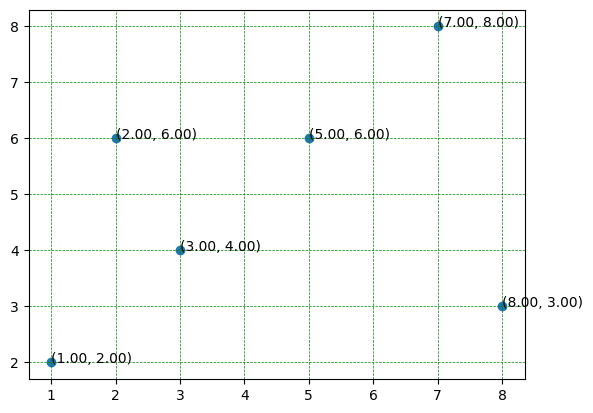

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 5, 7, 8]
y = [2, 6, 4, 6, 8, 3]

for xy in zip(x, y):
    plt.annotate('(%.2f, %.2f)' %xy, xy = xy)

plt.scatter(x, y)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()

In [3]:
def KDTree(point_list, depth):
    # Nếu danh sách rỗng, trả về None
    if not point_list:
        return None
    
    # Xác định trục để chia (0 cho x, 1 cho y)
    axis = depth % 2
    
    # Sắp xếp điểm theo trục hiện tại
    point_list.sort(key=lambda x: x[axis])
    
    # Tìm điểm trung vị
    median_idx = len(point_list) // 2
    median_point = point_list[median_idx]
    
    # Tạo node với điểm trung vị
    node = Node(median_point)
    
    # Chia các điểm còn lại thành 2 nửa
    left_points = point_list[:median_idx]
    right_points = point_list[median_idx + 1:]
    
    # Đệ quy để xây dựng cây con trái và phải
    node.left = KDTree(left_points, depth + 1)
    node.right = KDTree(right_points, depth + 1)
    
    return node

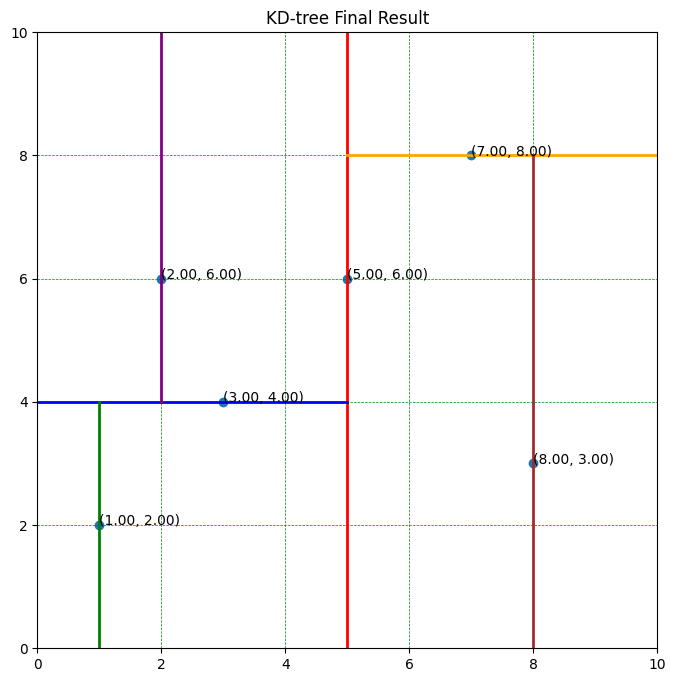

In [5]:
class Node:
    def __init__(self, point):
        self.point = point
        self.left = None 
        self.right = None

def collect_kdtree_lines(node, depth=0, xmin=0, xmax=10, ymin=0, ymax=10, lines=None):
    if lines is None:
        lines = []
    
    if node is None:
        return lines
    
    axis = depth % 2
    
    if axis == 0:
        lines.append({
            'type': 'vertical',
            'x': node.point[0],
            'ymin': ymin,
            'ymax': ymax
        })
        collect_kdtree_lines(node.left, depth + 1, xmin, node.point[0], ymin, ymax, lines)
        collect_kdtree_lines(node.right, depth + 1, node.point[0], xmax, ymin, ymax, lines)
    else:
        lines.append({
            'type': 'horizontal',
            'y': node.point[1],
            'xmin': xmin,
            'xmax': xmax
        })
        collect_kdtree_lines(node.left, depth + 1, xmin, xmax, ymin, node.point[1], lines)
        collect_kdtree_lines(node.right, depth + 1, xmin, xmax, node.point[1], ymax, lines)
    
    return lines

# Tạo danh sách điểm từ tọa độ x và y
points = list(zip(x, y))

# Xây dựng cây KD
root = KDTree(points.copy(), 0)

# Thu thập thông tin về các đường cần vẽ
lines = collect_kdtree_lines(root)

# Tạo một hình duy nhất
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.grid(color='green', linestyle='--', linewidth=0.5)

# Vẽ tất cả các đường phân chia
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
for i, line in enumerate(lines):
    color = colors[i % len(colors)]  # Lặp lại màu nếu có nhiều đường hơn số màu
    if line['type'] == 'vertical':
        plt.plot([line['x'], line['x']], [line['ymin'], line['ymax']], color=color, linewidth=2)
    else:
        plt.plot([line['xmin'], line['xmax']], [line['y'], line['y']], color=color, linewidth=2)

# Thêm nhãn cho các điểm
for point in zip(x, y):
    plt.annotate('(%.2f, %.2f)' % point, xy=point)

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('KD-tree Final Result')
plt.show()

In [8]:
def nearest_neighbor(x, node):
    # Hàm tính khoảng cách Euclidean giữa 2 điểm
    def distance(p1, p2):
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    
    # Hàm tìm kiếm điểm gần nhất trong cây KD
    def search(node, point, depth=0, best=None):
        # Nếu node rỗng, trả về điểm tốt nhất hiện tại
        if node is None:
            return best
        
        # Cập nhật điểm tốt nhất nếu tìm thấy điểm gần hơn
        if best is None or distance(point, node.point) < distance(point, best):
            best = node.point
            
        # Xác định trục phân chia (0: x, 1: y)
        axis = depth % 2
        next_best = best
        
        # Tìm kiếm trong nhánh phù hợp trước
        if point[axis] < node.point[axis]:
            # Tìm kiếm bên trái
            next_best = search(node.left, point, depth + 1, best)
            if next_best is not None and distance(point, next_best) < distance(point, best):
                best = next_best
            # Kiểm tra xem có cần tìm bên phải không
            if abs(point[axis] - node.point[axis]) < distance(point, best):
                next_best = search(node.right, point, depth + 1, best)
                if next_best is not None and distance(point, next_best) < distance(point, best):
                    best = next_best
        else:
            # Tìm kiếm bên phải
            next_best = search(node.right, point, depth + 1, best)
            if next_best is not None and distance(point, next_best) < distance(point, best):
                best = next_best
            # Kiểm tra xem có cần tìm bên trái không
            if abs(point[axis] - node.point[axis]) < distance(point, best):
                next_best = search(node.left, point, depth + 1, best)
                if next_best is not None and distance(point, next_best) < distance(point, best):
                    best = next_best
                    
        return best
    
    return search(node, x)

nearest_point = nearest_neighbor((6, 5), root)
print(f"Điểm gần nhất với (6, 8) là: {nearest_point}")

Điểm gần nhất với (6, 8) là: (5, 6)
